In [2]:
# Ved Chugh - Project 2
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy

sql_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sql_file)

In [3]:
# Part 1 start

# Create a table with the payroll, avg payroll, and team indentifiers
salary_query = "SELECT teamID, yearID, sum(salary) as total_pay, sum(salary)/count(salary) as team_pay_avg FROM Salaries GROUP BY teamID, yearID"
team_salaries = pd.read_sql(salary_query, conn)

# Create another table for winning percentage. Multiply by 100.0 first to avoid int division
winning_query = "SELECT (W * 100.0 / G) as win_percent, * FROM Teams"
win_per = pd.read_sql(winning_query, conn)

# Combine the first two to create a table with both total payroll and winning percentage
data = pd.merge(team_salaries, win_per, how= 'inner', on= ['teamID', 'yearID'])
data

# The Teams data begins at an earlier year than the Salaries data, but I was able to avoid that issue by 
# using an inner join. Additionally, the Teams data had a lot of empty data but this largely was avoided
# using the inner join and there were no empty slots in the important new columns

# End of part 1

,teamID,yearID,total_pay,team_pay_avg,win_percent,lgID,franchID,divID,Rank,G,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,ATL,1985,14807000.0,6.730455e+05,40.740741,NL,ATL,W,5,162,...,197.0,0.970,Atlanta Braves,Atlanta-Fulton County Stadium,1350137.0,105,106,ATL,ATL,ATL
1,BAL,1985,11560712.0,5.254869e+05,51.552795,AL,BAL,E,4,161,...,168.0,0.980,Baltimore Orioles,Memorial Stadium,2132387.0,97,97,BAL,BAL,BAL
2,BOS,1985,10897560.0,4.359024e+05,49.693252,AL,BOS,E,5,163,...,161.0,0.970,Boston Red Sox,Fenway Park II,1786633.0,104,104,BOS,BOS,BOS
3,CAL,1985,14427894.0,5.152819e+05,55.555556,AL,ANA,W,2,162,...,202.0,0.980,California Angels,Anaheim Stadium,2567427.0,100,100,CAL,CAL,CAL
4,CHA,1985,9846178.0,4.688656e+05,52.147239,AL,CHW,W,3,163,...,152.0,0.980,Chicago White Sox,Comiskey Park,1669888.0,104,104,CHW,CHA,CHA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,SLN,2014,120693000.0,4.310464e+06,55.555556,NL,STL,C,1,162,...,145.0,0.985,St. Louis Cardinals,Busch Stadium III,3540649.0,101,100,STL,SLN,SLN
854,TBA,2014,72689100.0,2.907564e+06,47.530864,AL,TBD,E,4,162,...,96.0,0.985,Tampa Bay Rays,Tropicana Field,1446464.0,97,97,TBR,TBA,TBA
855,TEX,2014,112255059.0,4.677294e+06,41.358025,AL,TEX,W,5,162,...,155.0,0.982,Texas Rangers,Rangers Ballpark in Arlington,2718733.0,101,101,TEX,TEX,TEX
856,TOR,2014,109920100.0,4.396804e+06,51.234568,AL,TOR,E,3,162,...,130.0,0.985,Toronto Blue Jays,Rogers Centre,2375525.0,102,102,TOR,TOR,TOR


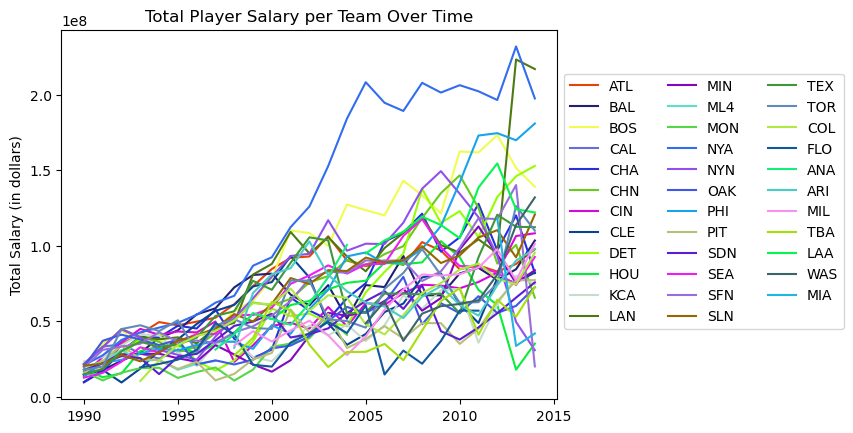

In [4]:
# Part 2 - Data Analysis

# Problem 2
data.sort_values('yearID', ascending= True)
post_90 = data[data['yearID'] >= 1990]
post_90 = post_90[['yearID', 'teamID', 'team_pay_avg', 'total_pay']]
teams = post_90['teamID'].drop_duplicates()

# Now, for each unique team, plot their graph over the course from 1990 to 2014
for team in teams:
    temp = post_90[post_90['teamID'] == team]
    plt.plot(temp['yearID'], temp['total_pay'], label= team, color= numpy.random.rand(3,))
    yr = numpy.random.randint(1990, 2014)

# Modify the table to make it prettier
plt.title("Total Player Salary per Team Over Time")
plt.ylabel("Total Salary (in dollars)")
sal_over_time = plt.legend(bbox_to_anchor=(1, 0.9), ncol=3)
sal_over_time

# Question 1: This plot shows the total salary in dollars over the time of the data we have for each team
# The central tendency of this plot is that total salary has been generally increasing over time
# the central spread of this part starts off low and increases over time, suggesting that differences in teams'
# payrolls have been increasing. Besides that, it looks like NYA consistently spends the most money

# End of problem 2

Text(0, 0.5, 'Mean Salary (USD)')

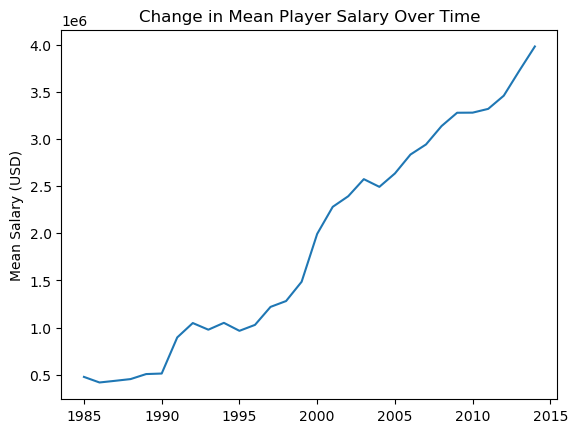

In [25]:
# Start of problem 3
# Code to product a plot that shows mean pay per player has increased over time

# Collect all the player salaries and find the avg salary for every year 
yearly_query = "SELECT yearID, sum(salary)/count(salary) as league_pay_avg FROM Salaries GROUP BY yearID"
yearly_avg = pd.read_sql(yearly_query, conn)

# Create plot and make pretty
plt.plot(yearly_avg['yearID'], yearly_avg['league_pay_avg'])
plt.title("Change in Mean Player Salary Over Time")
plt.ylabel("Mean Salary (USD)")

# End of problem 3

In [6]:
# Start of problem 4

# Create a table with win percentage by team
tiny_win_per_query = "SELECT  teamID,yearID, (W * 100.0 /G) as win_percent FROM Teams"
tiny_win_per = pd.read_sql(tiny_win_per_query, conn)

# Merge with the team salary data to create a table with a relationship between the two 
win_sal_data = pd.merge(team_salaries, tiny_win_per, how= 'inner', on= ['yearID', 'teamID'])
win_sal_data = win_sal_data[['teamID', 'yearID', 'total_pay', 'team_pay_avg', 'win_percent']]

# Cut the DataFrame and group it by these 5 year segments
bin_labels = ['1985 - 1990', '1991 - 1996', '1997 - 2002', '2003 - 2008', '2009 - 2014']
win_sal_data['bins'] = pd.cut(win_sal_data['yearID'], 5, labels= bin_labels)
by_bin = win_sal_data.groupby('bins')

# Separate each section into its own frame for analysis
y1985 = by_bin.get_group('1985 - 1990')
y1991 = by_bin.get_group('1991 - 1996')
y1997 = by_bin.get_group('1997 - 2002')
y2003 = by_bin.get_group('2003 - 2008')
y2009 = by_bin.get_group('2009 - 2014')

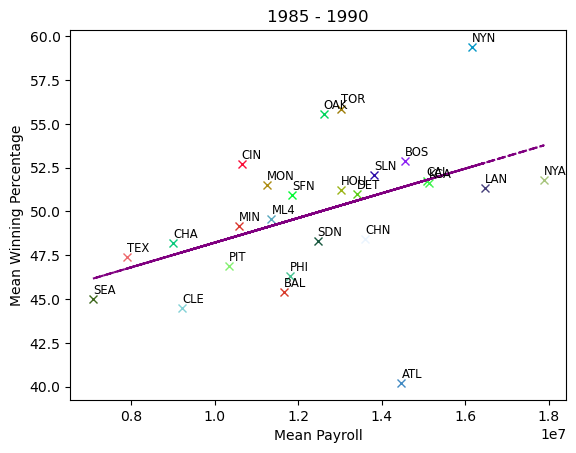

In [7]:
# 1985 - 1990

# Find all the teams for a specific year 
teams_1985 = y1985['teamID'].drop_duplicates()

# Create arrays to hold values for the linear regression analysis later
x = []
y = []

# For each team, find their avg win percentage and payroll over this time and plot it
for team in teams_1985:
    temp = y1985[y1985['teamID'] == team]
    avg_win = temp['win_percent'].sum() / temp['win_percent'].count()
    avg_sal = temp['total_pay'].sum() / temp['total_pay'].count()
    
    x.append(avg_sal)
    y.append(avg_win)

    plt.annotate(team , xy = (avg_sal, avg_win + 0.3), fontsize= 'small')
    plt.plot(avg_sal, avg_win, 'x', label= team, color= numpy.random.rand(3,))

# Make the plot pretty
plt.ylabel("Mean Winning Percentage")
plt.xlabel("Mean Payroll")
plt.title("1985 - 1990")

# Add a regression line
x = numpy.array(x)
y = numpy.array(y)
a, b = numpy.polyfit(x, y, 1)
plt.plot(x, a*x + b, color= 'purple', linestyle= '--')

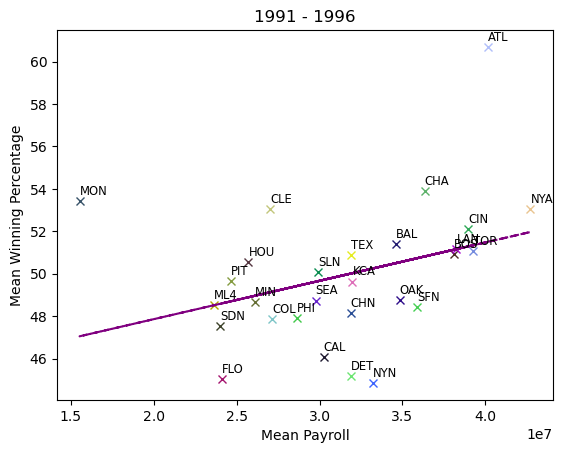

In [8]:
# 1991 - 1996
teams_1991 = y1991['teamID'].drop_duplicates()
x = []
y = []
for team in teams_1991:
    temp = y1991[y1991['teamID'] == team]
    avg_win = temp['win_percent'].sum() / temp['win_percent'].count()
    avg_sal = temp['total_pay'].sum() / temp['total_pay'].count()
    
    x.append(avg_sal)
    y.append(avg_win)

    plt.annotate(team , xy = (avg_sal, avg_win + 0.3), fontsize= 'small')
    plt.plot(avg_sal, avg_win, 'x', label= team, color= numpy.random.rand(3,))

plt.ylabel("Mean Winning Percentage")
plt.xlabel("Mean Payroll")
plt.title("1991 - 1996")

x = numpy.array(x)
y = numpy.array(y)
a, b = numpy.polyfit(x, y, 1)
plt.plot(x, a*x + b, color= 'purple', linestyle= '--')

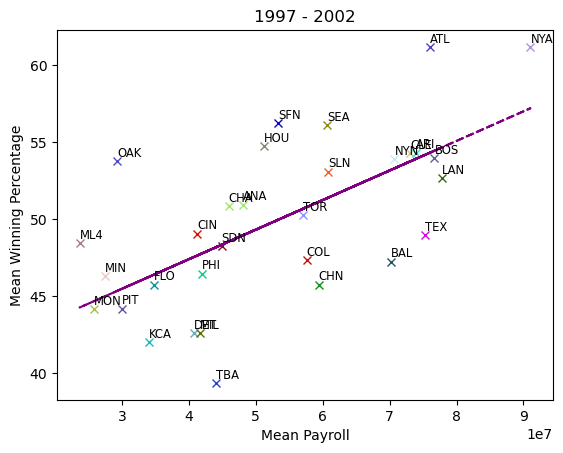

In [9]:
# 1997 - 2002
teams_1997 = y1997['teamID'].drop_duplicates()
x = []
y = []
for team in teams_1997:
    temp = y1997[y1997['teamID'] == team]
    avg_win = temp['win_percent'].sum() / temp['win_percent'].count()
    avg_sal = temp['total_pay'].sum() / temp['total_pay'].count()
    
    x.append(avg_sal)
    y.append(avg_win)

    plt.annotate(team , xy = (avg_sal, avg_win + 0.3), fontsize= 'small')
    plt.plot(avg_sal, avg_win, 'x', label= team, color= numpy.random.rand(3,))

plt.ylabel("Mean Winning Percentage")
plt.xlabel("Mean Payroll")
plt.title("1997 - 2002")

x = numpy.array(x)
y = numpy.array(y)
a, b = numpy.polyfit(x, y, 1)
plt.plot(x, a*x + b, color= 'purple', linestyle= '--')

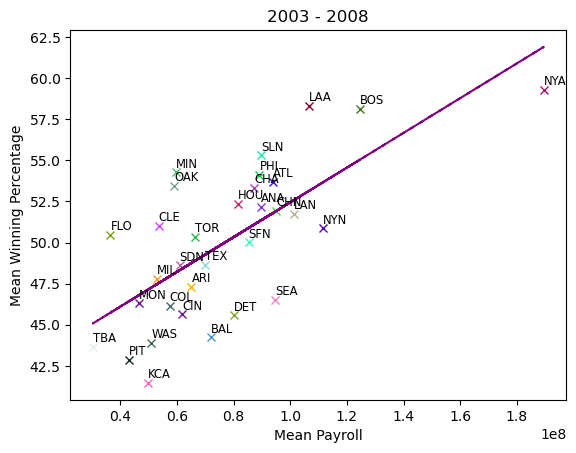

In [10]:
# 2003 - 2008
teams_2003 = y2003['teamID'].drop_duplicates()
x = []
y = []
for team in teams_2003:
    temp = y2003[y2003['teamID'] == team]
    avg_win = temp['win_percent'].sum() / temp['win_percent'].count()
    avg_sal = temp['total_pay'].sum() / temp['total_pay'].count()
    
    x.append(avg_sal)
    y.append(avg_win)

    plt.annotate(team , xy = (avg_sal, avg_win + 0.3), fontsize= 'small')
    plt.plot(avg_sal, avg_win, 'x', label= team, color= numpy.random.rand(3,))

plt.ylabel("Mean Winning Percentage")
plt.xlabel("Mean Payroll")
plt.title("2003 - 2008")

x = numpy.array(x)
y = numpy.array(y)
a, b = numpy.polyfit(x, y, 1)
plt.plot(x, a*x + b, color= 'purple', linestyle= '--')

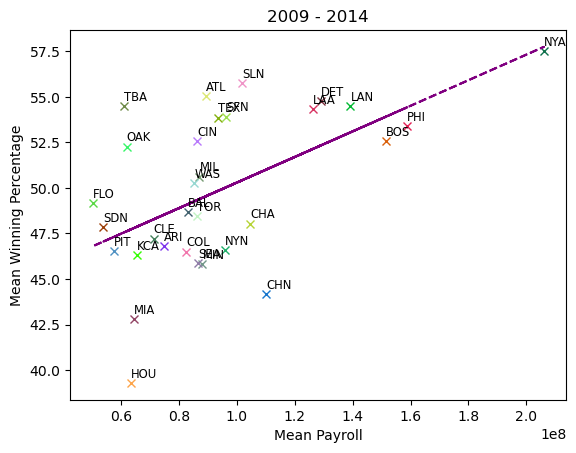

In [11]:
# 2009 - 2014
teams_2009= y2009['teamID'].drop_duplicates()
x = []
y = []
for team in teams_2009:
    temp = y2009[y2009['teamID'] == team]
    avg_win = temp['win_percent'].sum() / temp['win_percent'].count()
    avg_sal = temp['total_pay'].sum() / temp['total_pay'].count()
    
    x.append(avg_sal)
    y.append(avg_win)

    plt.annotate(team , xy = (avg_sal, avg_win + 0.3), fontsize= 'small')
    plt.plot(avg_sal, avg_win, 'x', label= team, color= numpy.random.rand(3,))

plt.ylabel("Mean Winning Percentage")
plt.xlabel("Mean Payroll")
plt.title("2009 - 2014")

x = numpy.array(x)
y = numpy.array(y)
a, b = numpy.polyfit(x, y, 1)
plt.plot(x, a*x + b, color= 'purple', linestyle= '--')

In [12]:
# Question 2: These plots show winning percentage as a fxn of payroll for each team in a 5 year period
# Team payrolls accross this period has generally decreased after the 2002 period. 
# The correlation between spending and wins also decreases generally after this 2002 mark but then rebounds
# in sucessive sections once other teams catch on to the moneyball concept. 
# In general, NYA spends and wins the most. Oakland usually did not have a high win percentage but then in the 
# 1997-2002 section, they stopped spending as much and started winning more. Moneyball!

# END OF PART 2

In [13]:
# PART 3

# Start of problem 5
import statistics
cad = data[['teamID', 'yearID', 'team_pay_avg', 'total_pay', 'win_percent']].copy()
cad['std_payroll'] = 'NaN'

# Find the standard deviation of the avg salaries for each year
years = yearly_avg
years = years.rename(columns= {'league_pay_avg': 'avg_pay_per_player'})
years['std_dev'] = 'NaN'
years['avg_payroll'] = 'NaN'

# Isolate a year and find a team's std dev and mean payroll for that year 
for index, row in years.iterrows():
    yr = row['yearID']
    temp = cad[cad['yearID'] == yr]
    std_dev = statistics.stdev(temp['total_pay'])
    mean_pay = statistics.mean(temp['total_pay'])
    years.loc[index, 'std_dev'] = std_dev
    years.loc[index, 'avg_payroll'] = mean_pay
    
# Now make the modifications to the std payroll column
for index, row in cad.iterrows():
    yr = row['yearID']
    sd = years.loc[years.yearID == yr, 'std_dev'].iat[0]
    yr_mean = years.loc[years.yearID == yr, 'avg_payroll'].iat[0]
    
    team_sal = cad.loc[index, 'total_pay']
    cad.loc[index, 'std_payroll'] = (team_sal - yr_mean) / sd

cad


,teamID,yearID,team_pay_avg,total_pay,win_percent,std_payroll
0,ATL,1985,6.730455e+05,14807000.0,40.740741,1.914905
1,BAL,1985,5.254869e+05,11560712.0,51.552795,0.601068
2,BOS,1985,4.359024e+05,10897560.0,49.693252,0.332678
3,CAL,1985,5.152819e+05,14427894.0,55.555556,1.761474
4,CHA,1985,4.688656e+05,9846178.0,52.147239,-0.092838
...,...,...,...,...,...,...
853,SLN,2014,4.310464e+06,120693000.0,55.555556,0.457126
854,TBA,2014,2.907564e+06,72689100.0,47.530864,-0.593171
855,TEX,2014,4.677294e+06,112255059.0,41.358025,0.272509
856,TOR,2014,4.396804e+06,109920100.0,51.234568,0.221422


In [14]:
# START OF PROBLEM 6

# Create groupings again
bin_labels = ['1985 - 1990', '1991 - 1996', '1997 - 2002', '2003 - 2008', '2009 - 2014']
cad['bins'] = pd.cut(cad['yearID'], 5, labels= bin_labels)
by_bin = cad.groupby('bins')

# Separate each section into its own frame for analysis
y1985 = by_bin.get_group('1985 - 1990')
y1991 = by_bin.get_group('1991 - 1996')
y1997 = by_bin.get_group('1997 - 2002')
y2003 = by_bin.get_group('2003 - 2008')
y2009 = by_bin.get_group('2009 - 2014')

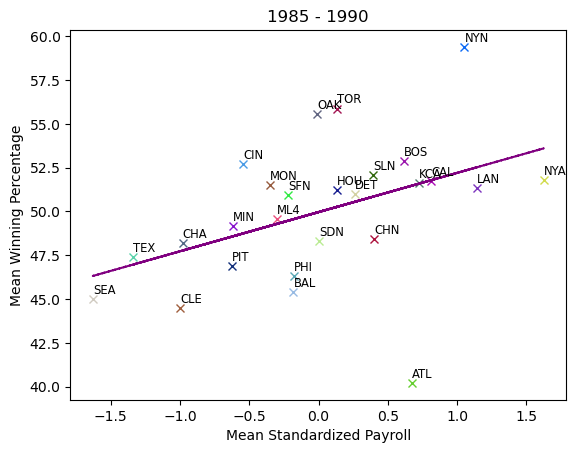

In [15]:
# Standardized data for 1985 - 1990
# Same exact steps as before 

teams_1985 = y1985['teamID'].drop_duplicates()
x = []
y = []
for team in teams_1985:
    temp = y1985[y1985['teamID'] == team]
    avg_win = temp['win_percent'].sum() / temp['win_percent'].count()
    avg_sal = temp['std_payroll'].sum() / temp['std_payroll'].count()
    
    x.append(avg_sal)
    y.append(avg_win)

    plt.annotate(team , xy = (avg_sal, avg_win + 0.3), fontsize= 'small')
    plt.plot(avg_sal, avg_win, 'x', label= team, color= numpy.random.rand(3,))

plt.ylabel("Mean Winning Percentage")
plt.xlabel("Mean Standardized Payroll")
plt.title("1985 - 1990")

x = numpy.array(x)
y = numpy.array(y)
a, b = numpy.polyfit(x, y, 1)
plt.plot(x, a*x + b, color= 'purple', linestyle= '--')

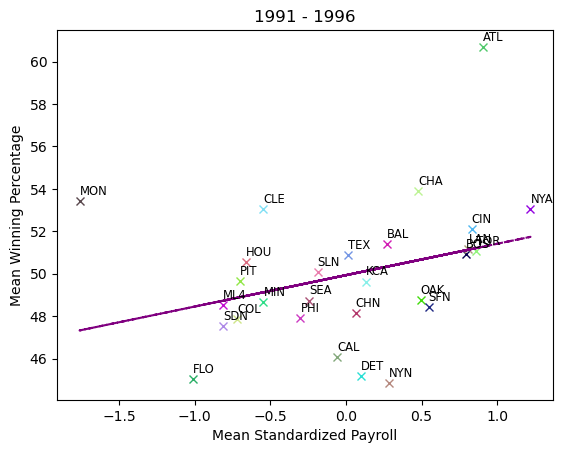

In [16]:
# Standardized data for 1991 - 1996
teams_1991 = y1991['teamID'].drop_duplicates()
x = []
y = []
for team in teams_1991:
    temp = y1991[y1991['teamID'] == team]
    avg_win = temp['win_percent'].sum() / temp['win_percent'].count()
    avg_sal = temp['std_payroll'].sum() / temp['std_payroll'].count()
    
    x.append(avg_sal)
    y.append(avg_win)

    plt.annotate(team , xy = (avg_sal, avg_win + 0.3), fontsize= 'small')
    plt.plot(avg_sal, avg_win, 'x', label= team, color= numpy.random.rand(3,))

plt.ylabel("Mean Winning Percentage")
plt.xlabel("Mean Standardized Payroll")
plt.title("1991 - 1996")

x = numpy.array(x)
y = numpy.array(y)
a, b = numpy.polyfit(x, y, 1)
plt.plot(x, a*x + b, color= 'purple', linestyle= '--')

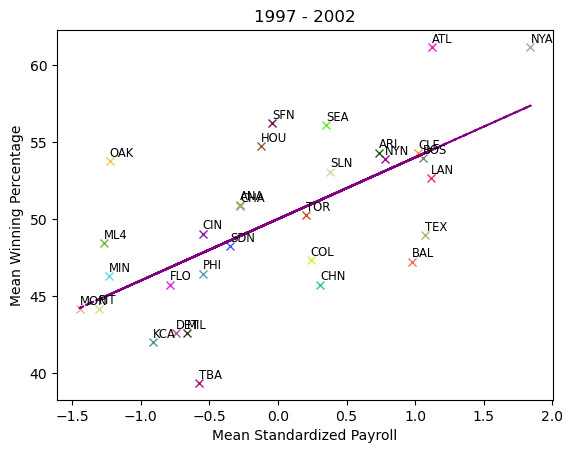

In [17]:
# Standardized data for 1997 - 2002
teams_1997 = y1997['teamID'].drop_duplicates()
x = []
y = []
for team in teams_1997:
    temp = y1997[y1997['teamID'] == team]
    avg_win = temp['win_percent'].sum() / temp['win_percent'].count()
    avg_sal = temp['std_payroll'].sum() / temp['std_payroll'].count()
    
    x.append(avg_sal)
    y.append(avg_win)

    plt.annotate(team , xy = (avg_sal, avg_win + 0.3), fontsize= 'small')
    plt.plot(avg_sal, avg_win, 'x', label= team, color= numpy.random.rand(3,))

plt.ylabel("Mean Winning Percentage")
plt.xlabel("Mean Standardized Payroll")
plt.title("1997 - 2002")

x = numpy.array(x)
y = numpy.array(y)
a, b = numpy.polyfit(x, y, 1)
plt.plot(x, a*x + b, color= 'purple', linestyle= '--')

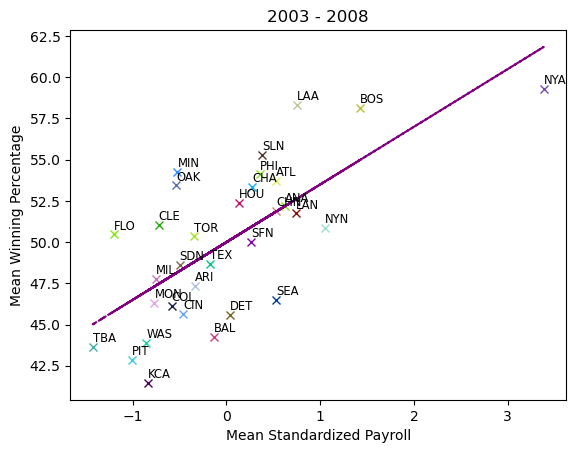

In [18]:
# Standardized data for 2003 - 2008
teams_2003 = y2003['teamID'].drop_duplicates()
x = []
y = []
for team in teams_2003:
    temp = y2003[y2003['teamID'] == team]
    avg_win = temp['win_percent'].sum() / temp['win_percent'].count()
    avg_sal = temp['std_payroll'].sum() / temp['std_payroll'].count()
    
    x.append(avg_sal)
    y.append(avg_win)

    plt.annotate(team , xy = (avg_sal, avg_win + 0.3), fontsize= 'small')
    plt.plot(avg_sal, avg_win, 'x', label= team, color= numpy.random.rand(3,))

plt.ylabel("Mean Winning Percentage")
plt.xlabel("Mean Standardized Payroll")
plt.title("2003 - 2008")

x = numpy.array(x)
y = numpy.array(y)
a, b = numpy.polyfit(x, y, 1)
plt.plot(x, a*x + b, color= 'purple', linestyle= '--')

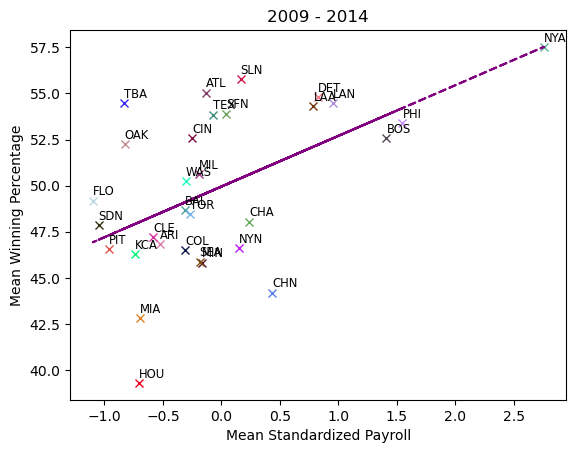

In [19]:
# Standardized data for 2009 - 2014
teams_2009 = y2009['teamID'].drop_duplicates()
x = []
y = []
for team in teams_2009:
    temp = y2009[y2009['teamID'] == team]
    avg_win = temp['win_percent'].sum() / temp['win_percent'].count()
    avg_sal = temp['std_payroll'].sum() / temp['std_payroll'].count()
    
    x.append(avg_sal)
    y.append(avg_win)

    plt.annotate(team , xy = (avg_sal, avg_win + 0.3), fontsize= 'small')
    plt.plot(avg_sal, avg_win, 'x', label= team, color= numpy.random.rand(3,))

plt.ylabel("Mean Winning Percentage")
plt.xlabel("Mean Standardized Payroll")
plt.title("2009 - 2014")

x = numpy.array(x)
y = numpy.array(y)
a, b = numpy.polyfit(x, y, 1)
plt.plot(x, a*x + b, color= 'purple', linestyle= '--')

In [20]:
# QUESTION 3: These plots show the mean winning percentage as a fxn of std payroll. 
# The plots from problem 6 show the relationships between salary and winning percentage much clearer. 
# In later years, teams are more likely to outperform their salary as compared to earlier years where many
# more teams underperformed

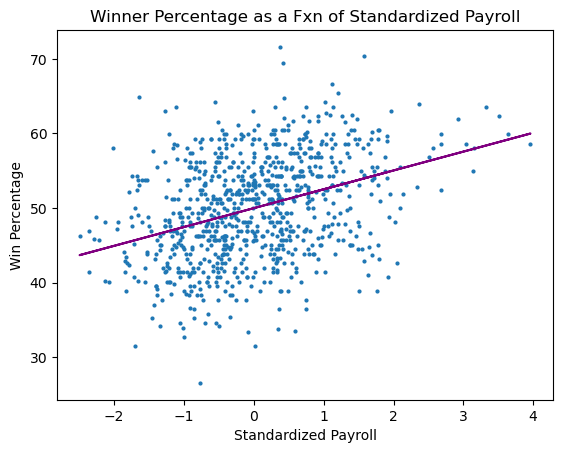

In [21]:
# START OF PROBLEM 7

# Create a regression line between win percentage and standard payroll
wp = list(cad['win_percent'])
sp = list(cad['std_payroll'])
a, b = numpy.polyfit(sp, wp, 1)

# Plot win percentage as a fxn of payroll and make plot pretty
plt.plot(sp, wp, '.', markersize= 4)
plt.title("Winner Percentage as a Fxn of Standardized Payroll")
plt.xlabel("Standardized Payroll")
plt.ylabel("Win Percentage")

# Add regression line
sp = numpy.array(sp)
plt.plot(sp, a*sp + b, color= 'purple', linestyle= '-')

In [22]:
# Create column for expected wins
cad['expected_win_pct'] = 'NaN'
for index, row in cad.iterrows():
    cad.loc[index, 'expected_win_pct'] = 50 + 2.5 * row.loc['std_payroll']
cad


,teamID,yearID,team_pay_avg,total_pay,win_percent,std_payroll,bins,expected_win_pct
0,ATL,1985,6.730455e+05,14807000.0,40.740741,1.914905,1985 - 1990,54.787263
1,BAL,1985,5.254869e+05,11560712.0,51.552795,0.601068,1985 - 1990,51.502671
2,BOS,1985,4.359024e+05,10897560.0,49.693252,0.332678,1985 - 1990,50.831694
3,CAL,1985,5.152819e+05,14427894.0,55.555556,1.761474,1985 - 1990,54.403684
4,CHA,1985,4.688656e+05,9846178.0,52.147239,-0.092838,1985 - 1990,49.767906
...,...,...,...,...,...,...,...,...
853,SLN,2014,4.310464e+06,120693000.0,55.555556,0.457126,2009 - 2014,51.142816
854,TBA,2014,2.907564e+06,72689100.0,47.530864,-0.593171,2009 - 2014,48.517072
855,TEX,2014,4.677294e+06,112255059.0,41.358025,0.272509,2009 - 2014,50.681273
856,TOR,2014,4.396804e+06,109920100.0,51.234568,0.221422,2009 - 2014,50.553554


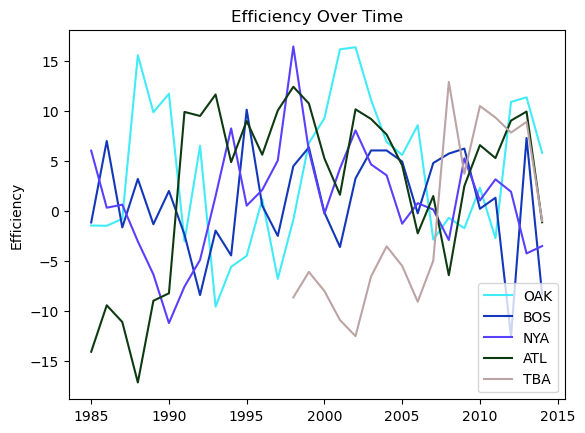

In [23]:
# START OF PROBLEM 8

# Add the efficiency for each team
cad['efficiency'] = 'NaN'
for index, row in cad.iterrows():
    cad.loc[index, 'efficiency'] = row.loc['win_percent'] - row.loc['expected_win_pct']

# Small plot sampling only A's, Yankees, Boston, Atlanta, and Tampa Bay
sample_tms = ["OAK", "BOS", "NYA", "ATL", "TBA"]
for team in sample_tms:
    temp = cad[cad['teamID'] == team]
    plt.plot(temp['yearID'], temp['efficiency'], label= team, color= numpy.random.rand(3,))

plt.title("Efficiency Over Time")
plt.ylabel("Efficiency")
plt.legend()


In [24]:
# Question 4: Plot shows the change in a few teams' efficiency from 1985 to 2015
# This plot more clearly shows by how much a team is outperforming others in a standardized way. 
# From 2000 - 2005, Oakland had by far the best efficiency out of this sample. Therefore, Moneyball worked!!!
# Until everybody caught up. Moneyball! Brad Pitt masterclass. 